# **About Walmart**
Walmart is an American multinational retail corporation that operates a chain of supercentres,discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

# Business Problem
The Management team at Walmart Inc. wants to analyse the customer purchase behaviour(specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?(Assume 50 million customers are male and 50 million are female).

# Step 1 Basic EDA (Loading Dataset, Checking Null Values,Checking Structure ,Value counts,Unique Values

In [ ]:
#importing all the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from scipy.stats import binom,geom,norm

In [ ]:
#Importing the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
!gdown 1qLXZI_KCj54jF-mAlvkBczAyGujiHbFS
df=pd.read_csv("walmart_data.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1qLXZI_KCj54jF-mAlvkBczAyGujiHbFS
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 40.8MB/s]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969




1.   It is a transition Data as we can see same ID repiting multiple times example - user_id 1000001 repeting 4 times for different product id's
2.   Need to explore the unique values for in some columns like marital status,product category,age,occupaion,city_cateogry

In [ ]:
# checking the datatypes of the column using info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB





1.   Occupation,product_cateogry will be changed to object
2.   marital status values will be update for 0 - single and for 1 - married



In [ ]:
#checking the size and shape of dataset using size and shape

print(df.shape,df.size)

(550068, 10) 5500680


It has 10 Columns and 550068 Rows

In [ ]:
#checking the null values in dataset

print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


No Null Values found in the dataset

In [ ]:
#checking the mean,median,mode and other stats

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Need to change datatype for marital status,product category and occupation

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In this current dataset we have only values 0 and 1 which means either person is married or single

In [ ]:
df['Product_Category'].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [ ]:
df["Product_Category"].nunique()

20

So we have total 20 Porduct Category and Cateogry 5 has the most sales.

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


It seems like from age 18 to age 45 these are ones which buying more.

In [ ]:
df['Occupation'].value_counts().head()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043


Top 5 Occupations which are buying



In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


Data is of three cities A,B,C and B among the top cities in purchasing

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


So there are 5 categories 0 - people which have living less than a year like for 1,2,3 but 4+ it may be collated of all 5 years ,6 years ,7 may be or more

In [ ]:
df['Gender'].value_counts()/df.shape[0]*100

,count
Gender,
M,75.310507
F,24.689493


In [ ]:
df.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225




1.   75 percent are male and 25 percent females
2.   There are 1666 feamles and 4225 females



#  Step **2** Data Cleaning - removing duplicates,handling outliers,standardizing values,data parsing ,Data type conversion

In [ ]:
# Update married_status column values with replace
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Single', 1: 'Married'})


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Single,324731
Married,225337


In [ ]:
# Need to change datatype for column occupation and product_category

df['Occupation'] = df['Occupation'].astype('object')

In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2,NaN,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,Single,NaN,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,12054.000000


Top Product is P00265242
Males are in majority
Age group 26-35 are highest buyers
People from City B are in the highest buyer cateogry
Single people tend to buy more compared to married
Avg sales are 9263 dollars

# Univariate Analysis

<Axes: xlabel='Occupation'>

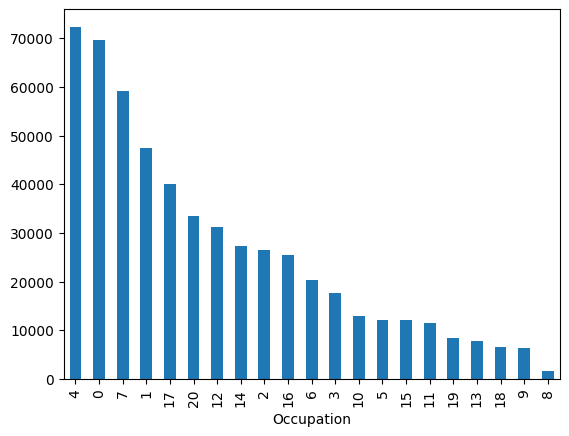

In [ ]:
df['Occupation'].value_counts().plot(kind='bar')

As we can se in purchase column the mean is significantly higher than the median,that means outliers are present and it is  a right-skewed distribution

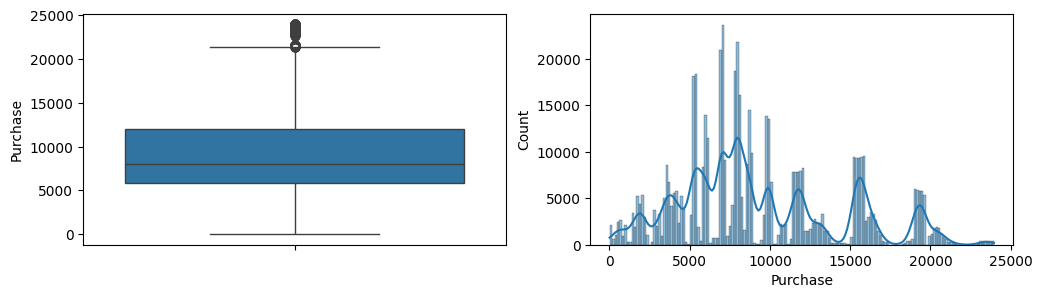

In [ ]:
# Let boxplot also for the purchase column
fig,axes=plt.subplots(1,2,figsize=(12,3))
axes[0]=sns.boxplot(df['Purchase'],ax=axes[0])
axes[1]=sns.histplot(df['Purchase'],kde=True,ax=axes[1])
plt.show()



1.   Outliers are present in the dataset
2.   Histogram and KDE plot proves data is not normal



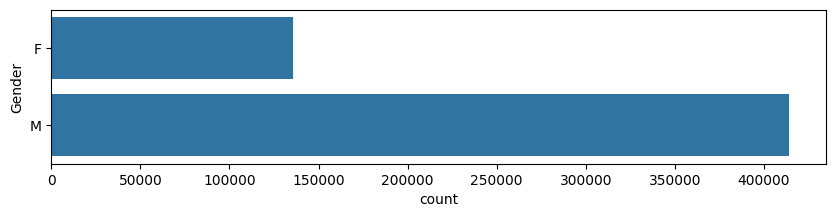

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(df['Gender'])
plt.show()

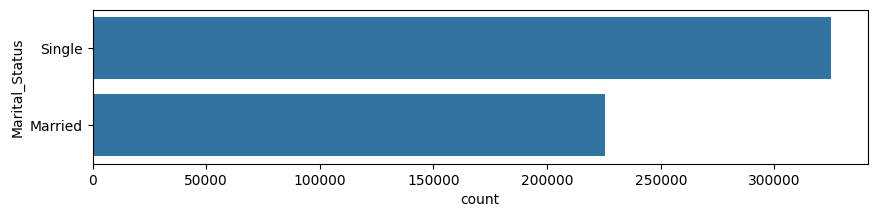

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(df['Marital_Status'])
plt.show()

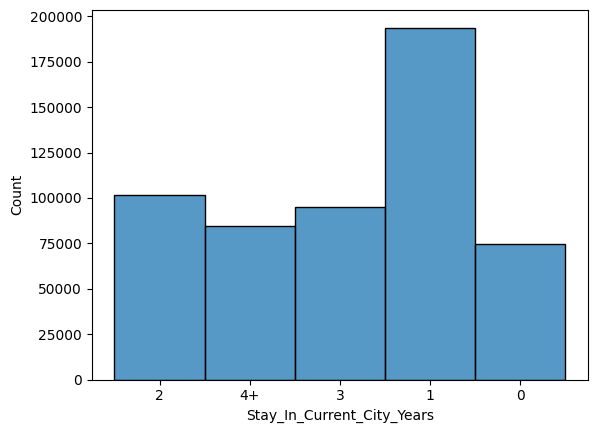

In [ ]:
sns.histplot(df['Stay_In_Current_City_Years'])
plt.show()

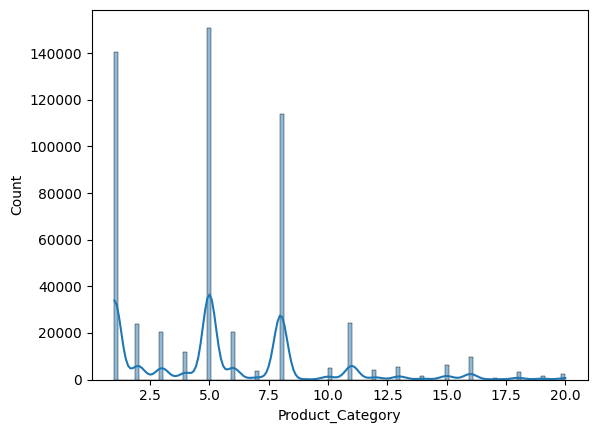

In [ ]:
sns.histplot(df['Product_Category'],kde=True)
plt.show()

# Bivariate Analysis

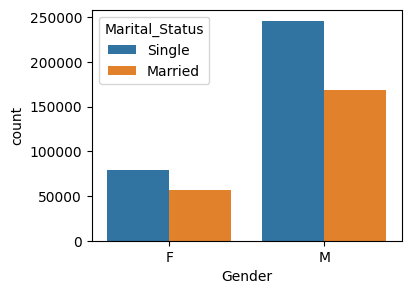

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='Gender',hue='Marital_Status',data=df)
plt.show()

Singles males and females tend to buy more campared to both married male and female

In [ ]:
print('female mean purchase',df[df['Gender']=='F']['Purchase'].mean(),"\n",'male mean purchase',df[df['Gender']=='M']['Purchase'].mean())

female mean purchase 8734.565765155476 
 male mean purchase 9437.526040472265


Average Male spend is high than compared to average female spend

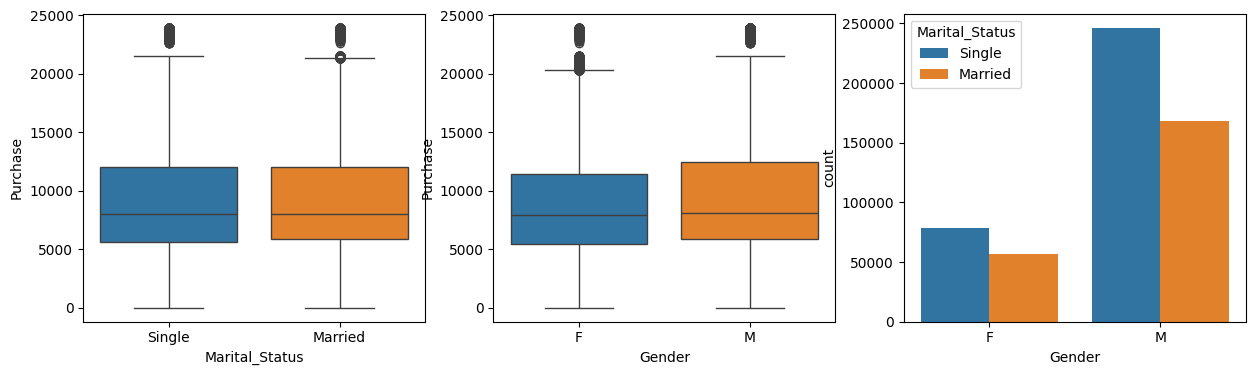

In [ ]:
# Let's Plot City wise barplot to see the distrubution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0]=sns.boxplot(x='Marital_Status',y='Purchase',data=df,hue='Marital_Status',ax=axes[0])
axes[1]=sns.boxplot(x='Gender',y='Purchase',hue='Gender',data=df,ax=axes[1])
axes[2]=sns.countplot(x='Gender',hue='Marital_Status',data=df,ax=axes[2])
plt.show()



*   Married and Single spending is same as per the boxplot

*   Single Male spend more compared to single or married male and female




In [ ]:
# Creating mask for male and female groups and storing in male and female

male=df[df['Gender']=='M']
female=df[df['Gender']=='F']


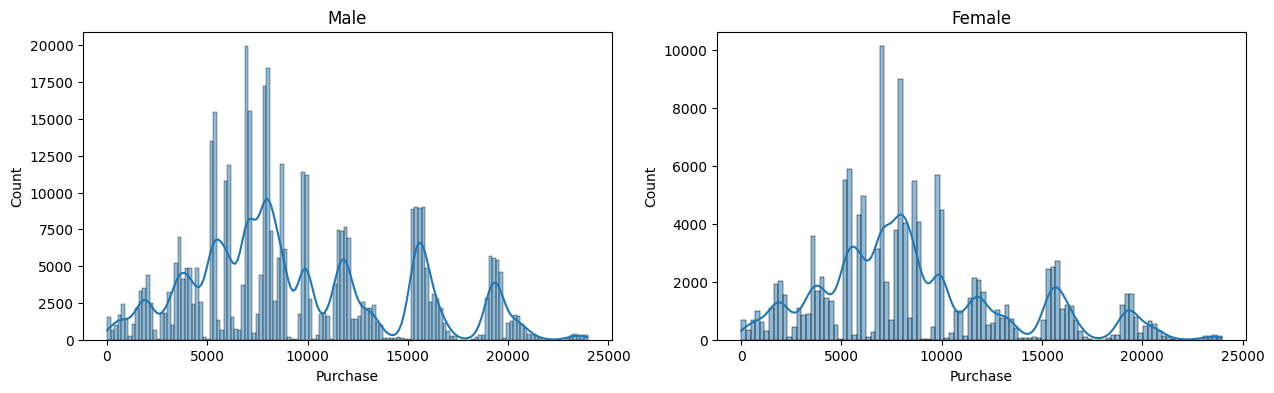

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0]=sns.histplot(x='Purchase',data=male,ax=axes[0],kde=True)
axes[1]=sns.histplot(x='Purchase',data=female,ax=axes[1],kde=True)

axes[1].set_title('Female')
axes[0].set_title('Male')

plt.show()

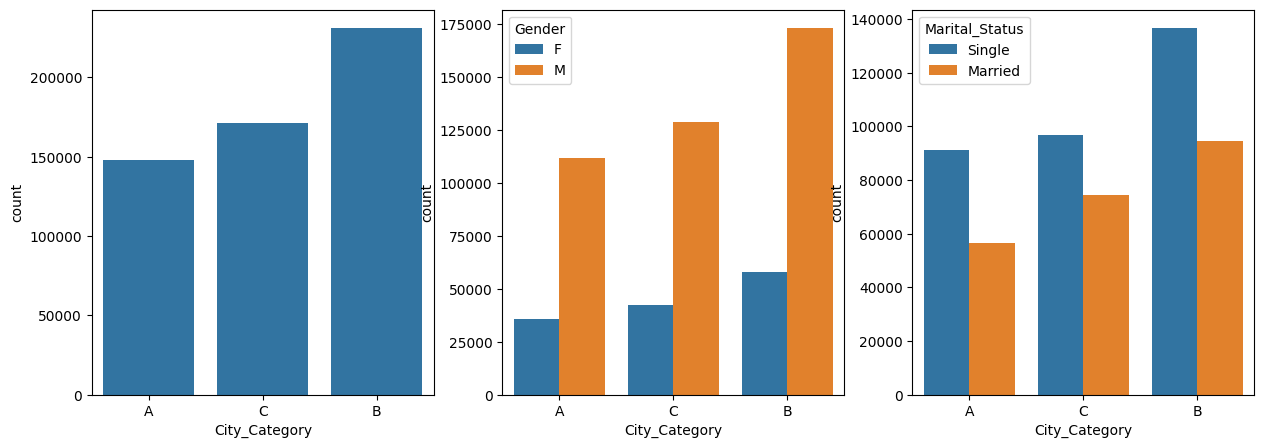

In [ ]:
# Let's Plot City wise barplot to see the distrubution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0]=sns.countplot(x='City_Category',data=df,ax=axes[0])
axes[1]=sns.countplot(x='City_Category',hue='Gender',data=df,ax=axes[1])
axes[2]=sns.countplot(x='City_Category',hue='Marital_Status',data=df,ax=axes[2])
plt.show()



*   City - B is the highest in purchase.
*   Male spends more which can be seen in the graph.
*   Single People spending is high from every city compared to married people.




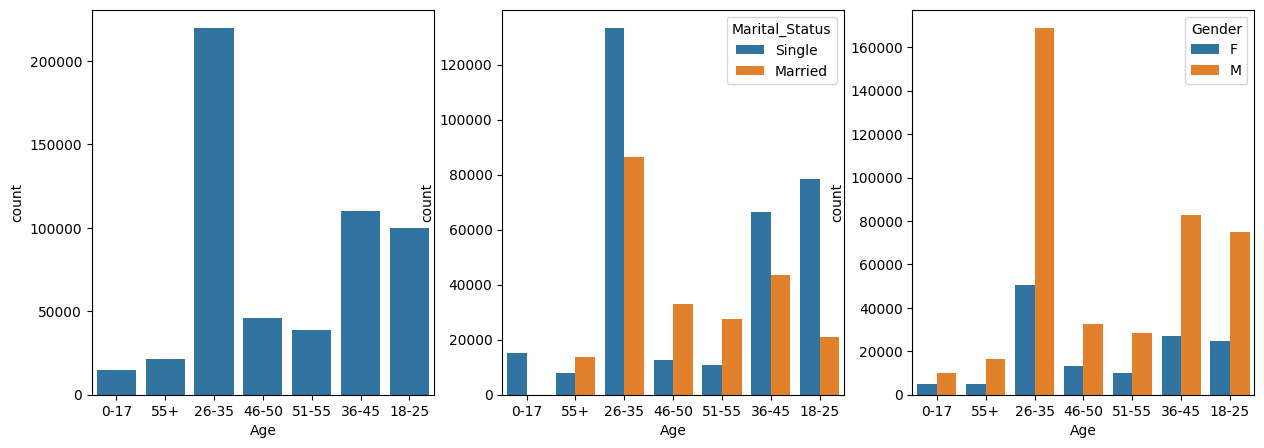

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0]=sns.countplot(x='Age',data=df,ax=axes[0])
axes[1]=sns.countplot(x='Age',hue='Marital_Status',data=df,ax=axes[1])
axes[2]=sns.countplot(x='Age',hue='Gender',data=df,ax=axes[2])

plt.show()



*   Age group '18-25','26-35','36-45' Males and single people are the high in spending




#QnA

##
1.   Are women spending more money per transaction than men? Why or Why not?
2.   Confidence intervals and distribution of the mean of the expenses by female and male customers
3.   Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
4.   Results when the same activity is performed for Married vs Unmarried
5.   Results when the same activity is performed for Age




### Calculating the Average Purchase Mean and Samples Mean and Confidence Interval for Male V/s Female

In [ ]:
# Are women spending more money per transaction than men? Why or Why not?

mean_spending = df.groupby('Gender')['Purchase'].describe()
mean_spending

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Median for both male and feamle are close to each other 7914 and 8098

In [ ]:
# Q2 Confidence intervals and distribution of the mean of the expenses by female and male customers
male_spending=male['Purchase']
female_spending=female['Purchase']

# Let's start with creating a function to simulate a sample means

def sample_means(data, sample_size,iterations=1000):
    sample_means = []
    for _ in range(iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

sample_means_male = sample_means(male_spending, sample_size=300)
sample_means_female =sample_means(female_spending, sample_size=300)



In [ ]:
# Calculating confidence interval for 95% confidence
# Confidence Interval=Sample Mean±Margin of Error

# Example Data
def calculate_ci(data, confidence_level=0.95):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    n = len(data)
    confidence_level = 0.95

    # Calculate confidence interval
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

lower_bound_male, upper_bound_male = calculate_ci(sample_means_male)
lower_bound_female, upper_bound_female = calculate_ci(sample_means_female)
print(f"95% Confidence Interval for Male Spending: ({lower_bound_male:.2f}, {upper_bound_male:.2f})")
print(f"95% Confidence Interval for Female Spending: ({lower_bound_female:.2f}, {upper_bound_female:.2f})")


95% Confidence Interval for Male Spending: (9421.42, 9457.39)
95% Confidence Interval for Female Spending: (8708.27, 8743.30)


<Axes: ylabel='Count'>

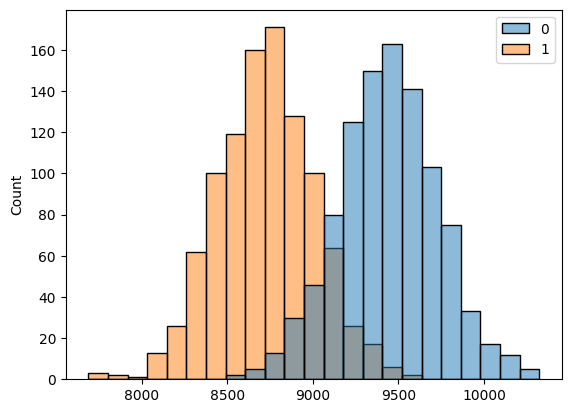

In [ ]:
sns.histplot([sample_means_male,sample_means_female])

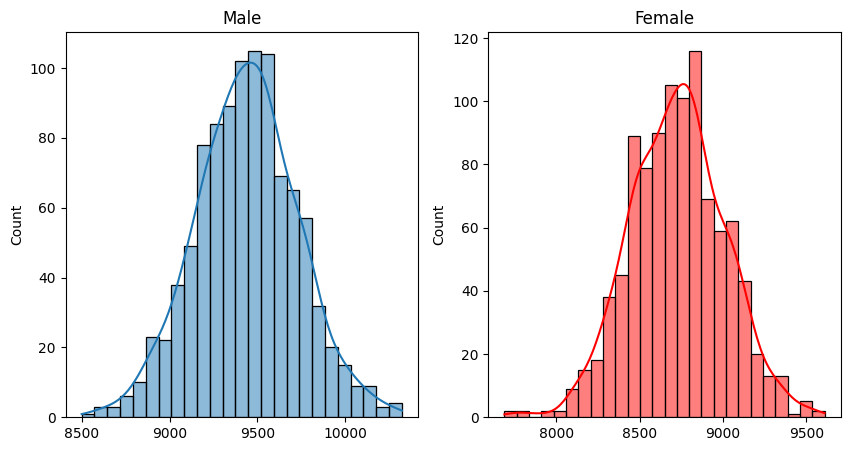

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0]=sns.histplot(sample_means_male,kde=True,ax=axes[0])
axes[0].set_title('Male')
axes[1]=sns.histplot(sample_means_female,kde=True,ax=axes[1],color='r')
axes[1].set_title('Female')
plt.show()

Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?




1.   95% Confidence Interval for Male Spending: (9421.42, 9457.39)
2.   95% Confidence Interval for Female Spending: (8708.27, 8743.30)

So Confidence interval of male and female are not overlapping so following actions can be taken



1.   Gender-Specific Strategies:

Tailor promotions to the group with higher spending (e.g., target women if they spend more on average).
Design personalized experiences based on spending patterns, such as exclusive deals for high-spending customer groups.

2.  Reevaluate Product Placement:

Position products more effectively to appeal to gender-specific preferences.
Optimize in-store layouts or digital recommendations for better engagement.







### Calculate Sample Mean and Confidence Interval for Married V/S Unmarried

In [ ]:
# Five Point Summary

df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0
Single,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


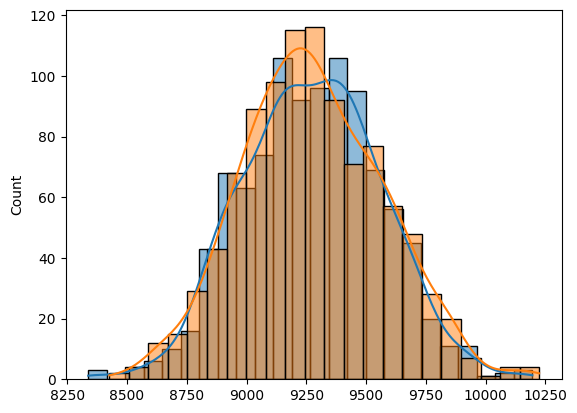

95% Confidence Interval for Married Spending: (9257.033961981211, 9292.54059801879)
95% Confidence Interval for Unmarried Spending: (9258.219331630486, 9294.888475036178)


In [ ]:

# Calculating Confidence Interval for married and unmarried
married=df[df['Marital_Status']=='Married']['Purchase']
unmarried=df[df['Marital_Status']=='Single']['Purchase']

# calculate sample means
sample_means_married = sample_means(married, sample_size=300)
sample_means_unmarried =sample_means(unmarried, sample_size=300)
sns.histplot(sample_means_married,kde=True)
sns.histplot(sample_means_unmarried,kde=True)
plt.show()
# Calculate confidence intervals
ci_married = calculate_ci(sample_means_married)
ci_unmarried = calculate_ci(sample_means_unmarried)
print(f"95% Confidence Interval for Married Spending: {ci_married}")
print(f"95% Confidence Interval for Unmarried Spending: {ci_unmarried}")


It can be clearly seen that samples mean distribution of Married and Unmarried are overlapping and also we can the numbers as well Married Spending: (9257.033961981211, 9292.54059801879) and Unmarried Spending: (9258.219331630486, 9294.888475036178)



### Sample Mean and Confidence Interval for different Age Groups



In [ ]:
# Diffrerent age groups

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# Five Point Summary

df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
# Creating mask for 7 age groups
a=df[df['Age']=='0-17']['Purchase']
b=df[df['Age']=='18-25']['Purchase']
c=df[df['Age']=='26-35']['Purchase']
d=df[df['Age']=='36-45']['Purchase']
e=df[df['Age']=='46-50']['Purchase']
f=df[df['Age']=='51-55']['Purchase']
g=df[df['Age']=='55+']['Purchase']


In [ ]:
# calculating sample means for different age groups

sample_a=sample_means(a, sample_size=300)
sample_b=sample_means(b, sample_size=300)
sample_c=sample_means(c, sample_size=300)
sample_d=sample_means(d, sample_size=300)
sample_e=sample_means(e, sample_size=300)
sample_f=sample_means(f, sample_size=300)
sample_g=sample_means(g, sample_size=300)

In [ ]:
# Calculate confidence intervals for the age groups
ci_a = calculate_ci(sample_a)
ci_b = calculate_ci(sample_b)
ci_c = calculate_ci(sample_c)
ci_d = calculate_ci(sample_d)
ci_e = calculate_ci(sample_e)
ci_f = calculate_ci(sample_f)
ci_g = calculate_ci(sample_g)


print(f"95% Confidence Interval for Age Group '0-17':  {ci_a}")
print(f"95% Confidence Interval for Age Group '18-25': {ci_b}")
print(f"95% Confidence Interval for Age Group '26-35': {ci_c}")
print(f"95% Confidence Interval for Age Group '36-45': {ci_d}")
print(f"95% Confidence Interval for Age Group '46-50': {ci_e}")
print(f"95% Confidence Interval for Age Group '51-55': {ci_f}")
print(f"95% Confidence Interval for Age Group '55+':   {ci_g}")


95% Confidence Interval for Age Group '0-17': (8920.575526277507, 8956.501953722493)
95% Confidence Interval for Age Group  '18-25': (9141.376206253637, 9178.396580413031)
95% Confidence Interval for Age Group '26-35': (9231.11812402731, 9265.975622639355)
95% Confidence Interval for Age Group '36-45': (9310.442494649384, 9347.426298683948)
95% Confidence Interval for Age Group '46-50': (9180.513869955412, 9217.308763377921)
95% Confidence Interval for Age Group '51-55': (9518.79708587634, 9555.805127456995)
95% Confidence Interval for Age Group '55+': (9308.097964795663, 9342.735668537669)


Age Groups -->'18-25' , '26-35' , '36-45' are overlapping and can be seen in the histplot as well

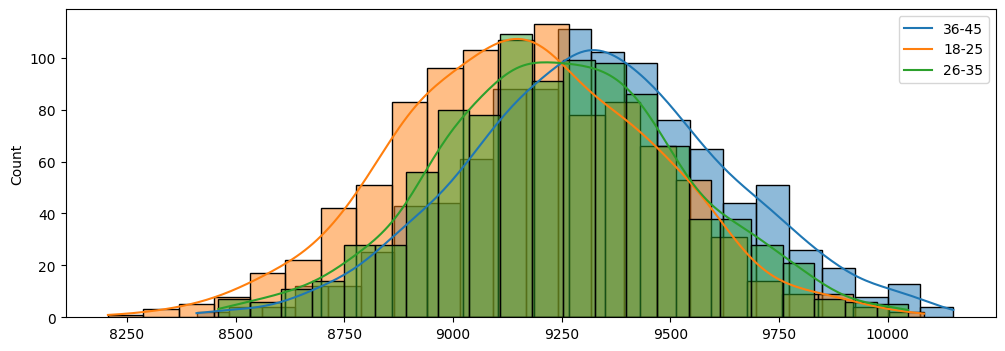

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(sample_d,kde=True)
sns.histplot(sample_b,kde=True)
sns.histplot(sample_c,kde=True)
plt.legend(['36-45','18-25','26-35'])
plt.show()

# Insights

In [ ]:
'''
It is a transition Data as we can see same ID repiting multiple times example - user_id 1000001 repeating 4 times for different product id's
Data Contain No Null Values

Data set categorized on their marital status has only two values married and single.

Dataset contains the data 20 Products categories and Category 5 is the highest sales.Top Product is P00265242

It seems like from age 18 to age 45 these are ones which buying more.

Top 5 Occupations which are buying 4,0,7,1,17

Data is of three cities A,B,C and B among the top cities in purchasing

So there are 5 categories 0 - people which have living less than a year like for 1,2,3 but 4+ it may be collated of all 5 years ,6 years ,7 may be or more

75 percent are male and 25 percent females and There are 1666 females and 4225 males in the dataset

As we can se in purchase column the mean is significantly higher than the median that means outliers are present and it is a right-skewed distribution

Average Male spend is high than compared to average female spend

Single Male spend more compared to single or married male and female

City - B is the highest in purchase.
Male spends more which can be seen in the graph.
Single People spending is high from every city compared to married people.

Male spends more as comapred to females and their samples mean distribution do not overlap and with
95% Confidence Interval for Male Spending: (9421.42, 9457.39)
95% Confidence Interval for Female Spending: (8708.27, 8743.30)


It can be clearly seen that samples mean distribution of Married and Unmarried are overlapping and
with 95% Confidence interval of
Married Spending: (9257.033961981211, 9292.54059801879)
Unmarried Spending: (9258.219331630486, 9294.888475036178)

Age Groups -->'18-25' , '26-35' , '36-45' are overlapping and with
95% Confidence Interval for Age Group  '18-25': (9141.376206253637, 9178.396580413031)
95% Confidence Interval for Age Group '26-35': (9231.11812402731, 9265.975622639355)
95% Confidence Interval for Age Group '36-45': (9310.442494649384, 9347.426298683948)

'''

# Recomendations

In [ ]:
'''
So Confidence interval of male and female are not overlapping so following actions can be taken

Gender-Specific Strategies:
Tailor promotions to the group with higher spending (e.g., target women if they spend more on average). Design personalized experiences based on spending patterns, such as exclusive deals for high-spending customer groups.

Reevaluate Product Placement:
Position products more effectively to appeal to gender-specific preferences. Optimize in-store layouts or digital recommendations for better engagement.

'''